In [1]:
import SIMSIToolBox
import os
import pandas as pd
import numpy as np
import SIMSIToolBox.recalibration
import matplotlib.pyplot as plt

In [17]:
imzMLDir = "X:/Kayla/MALDI Imaging Test/New folder/" #path to folder that contains .imzML and .idb files
metaspaceFilt = "X:/Kayla/MALDI Imaging Test/New folder/metaspace_annotations.csv" #path to csv file that is the output from metaspace
num_cores = 20 #number of processor cores to use

In [3]:
#get imzMLs in the folder
imzMLs = [x for x in os.listdir(imzMLDir) if ".imzML" in x] #get imzMLs
imzMLs

['labeled low energy-total ion count.imzML',
 'labeled_higherenergy-TIC.imzML',
 'labeled_higherenergy-TIC_recal.imzML']

In [8]:
#read metaspace file
metaspace = pd.read_csv(metaspaceFilt,header=2) 
metaspace = metaspace.sort_values(by="mz")
mzs = metaspace["mz"]
len(mzs)

55

6750 peaks found
54 hits found
54 peaks in roi found


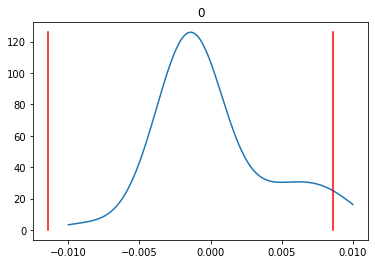

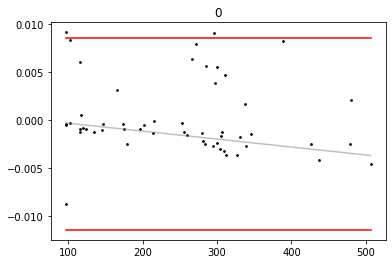

In [11]:
#visualize recalibration parameters
if __name__ == "__main__":
    file = imzMLs[0]
    tolerance = 0.01 #maximum expected mass drift
    step = 0.002 #smoothing on histogram
    dalim = 0.01 #bounding on histogram fit
    threshold = 100 #noise threshold for peak matching
    SIMSIToolBox.recalibration.visualizeParameters(imzMLDir + file,1,tolerance,np.array(mzs),step,dalim,threshold)

In [ ]:
#recalibrate imzMLs
if __name__ == "__main__":
    for file in imzMLs:
        SIMSIToolBox.recalibration.write_corrected_msi(imzMLDir + file,imzMLDir + file.replace(".imzML","_recal.imzML"),tolerance,mzs,step,dalim,threshold,numCores=num_cores)


reading spectra...